In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
T = 2
dt = 0.01
t = np.arange(-T / 2, T / 2, dt)

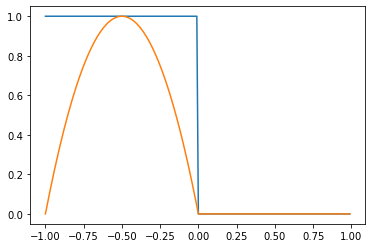

In [12]:
parabolic_mask = t < 0
parabolic = parabolic_mask * (1 - (2 * t + 1)**2)
plt.plot(t, parabolic_mask)
plt.plot(t, parabolic)

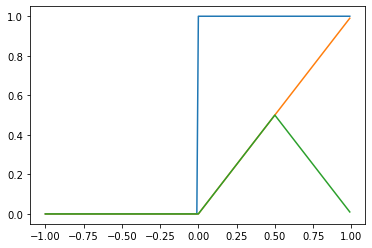

In [19]:
triangle_mask = t > 0
triangle = triangle_mask * t
plt.plot(t, triangle_mask)
plt.plot(t, triangle)
triangle[triangle > 0.5] = -triangle[triangle > 0.5] + 1
plt.plot(t, triangle)

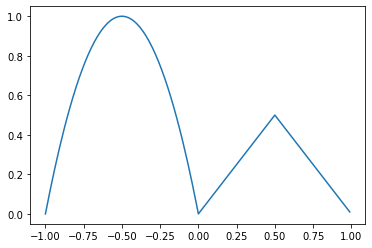

In [20]:
y = parabolic + triangle
plt.plot(t, y)

In [95]:
n = np.arange(1, 25)
omega = 2 * np.pi * n / T

In [96]:
y = y.reshape(1, -1)
t = t.reshape(1, -1)
omega = omega.reshape(-1, 1)

In [97]:
a = np.trapz(y * np.cos(omega * t), dx=dt, axis=1) * 2 / T

In [98]:
b = np.trapz(y * np.sin(omega * t), dx=dt, axis=1) * 2 / T

In [99]:
a0 = np.trapz(y, dx=dt) * 2 / T

In [100]:
t_fs = np.arange(-2 * T, 2 * T, dt)

In [101]:
a = a.reshape(-1, 1)
b = b.reshape(-1, 1)

In [102]:
y_fs = a0 / 2 + np.sum(a * np.cos(omega * t_fs) + b * np.sin(omega * t_fs), axis=0)

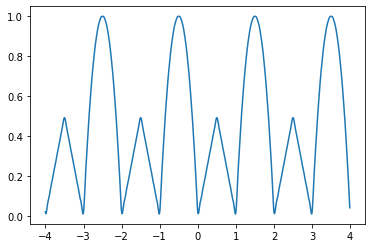

In [103]:
plt.plot(t_fs, y_fs)

In [110]:
omega0 = 5

In [111]:
lowpass_mag = omega0 / np.sqrt(omega0**2 + omega**2)
lowpass_mag

array([[0.84673302],
       [0.62267699],
       [0.46864979],
       [0.36969785],
       [0.30331447],
       [0.25639146],
       [0.22170592],
       [0.19511986],
       [0.17413698],
       [0.15717673],
       [0.14319524],
       [0.13147778],
       [0.12151958],
       [0.11295455],
       [0.10551104],
       [0.09898334],
       [0.09321295],
       [0.0880758 ],
       [0.08347342],
       [0.0793267 ],
       [0.07557134],
       [0.07215459],
       [0.06903272],
       [0.06616923]])

In [112]:
lowpass_phase = np.arctan(omega / omega0)
lowpass_phase

array([[0.56098212],
       [0.89863709],
       [1.08303462],
       [1.19211252],
       [1.26262726],
       [1.31150932],
       [1.34723274],
       [1.37441667],
       [1.39576703],
       [1.41296514],
       [1.42710715],
       [1.43893677],
       [1.44897566],
       [1.45760019],
       [1.46508853],
       [1.47165063],
       [1.47744786],
       [1.48260626],
       [1.48722567],
       [1.4913862 ],
       [1.49515287],
       [1.49857898],
       [1.50170866],
       [1.50457872]])

In [113]:
a_lowpass = a * lowpass_mag
b_lowpass = b * lowpass_mag

In [114]:
y_lowpass = a0 / 2 + np.sum(a_lowpass * np.cos(omega * t_fs + lowpass_phase) + b_lowpass * np.sin(omega * t_fs + lowpass_phase), axis=0)

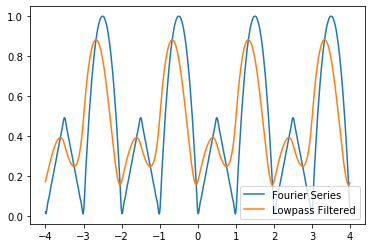

In [115]:
plt.plot(t_fs, y_fs, label="Fourier Series")
plt.plot(t_fs, y_lowpass, label="Lowpass Filtered")
plt.legend()